In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("heartDisease.csv")

In [2]:
# Split the data into features and target
X = df.drop("target", axis=1)
y = df["target"]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Import ensemble models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [5]:
# Create the ensemble models
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
abc = AdaBoostClassifier(n_estimators=100, random_state=42)

In [6]:
# Fit the models to the training data
rfc.fit(X_train_scaled, y_train)
gbc.fit(X_train_scaled, y_train)
abc.fit(X_train_scaled, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [7]:
# Predict the target variable for the testing data
rfc_pred = rfc.predict(X_test_scaled)
gbc_pred = gbc.predict(X_test_scaled)
abc_pred = abc.predict(X_test_scaled)

In [8]:
# Calculate the accuracy scores for the models
from sklearn.metrics import accuracy_score
rfc_score = accuracy_score(y_test, rfc_pred)
gbc_score = accuracy_score(y_test, gbc_pred)
abc_score = accuracy_score(y_test, abc_pred)

In [9]:
# Print the accuracy scores for the models
print("Random Forest Classifier Accuracy: {:.2f}%".format(rfc_score*100))
print("Gradient Boosting Classifier Accuracy: {:.2f}%".format(gbc_score*100))
print("AdaBoost Classifier Accuracy: {:.2f}%".format(abc_score*100))

Random Forest Classifier Accuracy: 83.61%
Gradient Boosting Classifier Accuracy: 78.69%
AdaBoost Classifier Accuracy: 77.05%


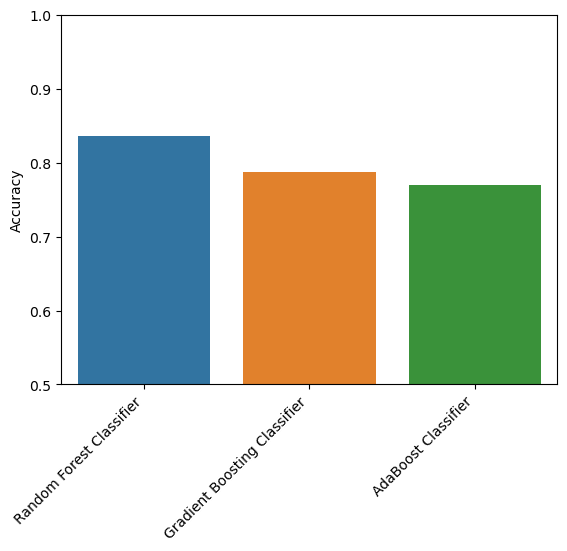

In [10]:
# Plot the accuracy scores for the models
models = ["Random Forest Classifier", "Gradient Boosting Classifier", "AdaBoost Classifier"]
scores = [rfc_score, gbc_score, abc_score]
sns.barplot(x=models, y=scores)
plt.ylim([0.5, 1])
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha='right') # rotate labels by 45 degrees and align right
plt.show()